# Machine Learning Assignment 1
1.  Data preprocessing
2. Data cleaning
3. Applying Different Ml Algorithm on Datasets
4. Making pkl file of best model with highest accuracy


### Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = 'customer_churn_large_dataset.xlsx'

df = pd.read_excel(file_path)

print(df.head())

   CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5  Customer_5   46  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                          17         73.36             236      0  
1                           1         48.76             172      0  
2                           5         85.47             460      0  
3                           3         97.94             297      1  
4                          19         58.14             266      0  


In [ ]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [ ]:
df.shape

(100000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


Gender ( Categorical -> Numerical )


*   Male: 0
*   Female: 1


In [ ]:
df['Gender'].replace(to_replace=['Male','Female'], value=[0,1], inplace=True)

In [ ]:
df['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

Location ( Categorical -> Numerical )


*   Los Angeles: 0
*   New York: 1
*   Miami: 2
*   Chicago: 3
*   Houston: 4



In [ ]:
df['Location'].replace(to_replace=['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'], value=[0,1,2,3,4], inplace=True)

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,0,0,17,73.36,236,0
1,2,Customer_2,62,1,1,1,48.76,172,0
2,3,Customer_3,24,1,0,5,85.47,460,0
3,4,Customer_4,36,1,2,3,97.94,297,1
4,5,Customer_5,46,1,2,19,58.14,266,0


# Preprocessing Steps

Step 1: Divide dataframe into Independent variable/input and
dependent/output features

*   Independent Varibles :- Age, Gender, Location, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB
*   Dependent Varibles :- Churn



In [ ]:
# Dependent/Independent Variables

X = df.iloc[:,2:8]
Y = df.iloc[:,-1]


In [ ]:
print(X.head())

   Age  Gender  Location  Subscription_Length_Months  Monthly_Bill  \
0   63       0         0                          17         73.36   
1   62       1         1                           1         48.76   
2   24       1         0                           5         85.47   
3   36       1         2                           3         97.94   
4   46       1         2                          19         58.14   

   Total_Usage_GB  
0             236  
1             172  
2             460  
3             297  
4             266  


In [ ]:
print(Y.head())

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64


## Normalize the Data

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.24167039, -1.00432937, -1.41489431,  0.65111499,  0.41060598,
        -0.29428898],
       [ 1.17622625,  0.99568929, -0.70877818, -1.65887854, -0.80537409,
        -0.78485174],
       [-1.31065114,  0.99568929, -1.41489431, -1.08138015,  1.0092043 ,
         1.42268068],
       [-0.52532144,  0.99568929, -0.00266206, -1.37012935,  1.62559745,
         0.17327865],
       [ 0.12911998,  0.99568929, -0.00266206,  0.93986418, -0.3417199 ,
        -0.06433769]])

## Split the Data into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X,Y,test_size = 0.3,random_state = 10)
print ('Train set:', X_train.shape, Y_train.shape)
print ('Test set:', X_test.shape, Y_test.shape)

Train set: (70000, 6) (70000,)
Test set: (30000, 6) (30000,)



# Classification Algorithms
1.   K Nearest Neighbor(KNN)
2.  Decision Tree
3. Logistic Regression



# 1.KNN

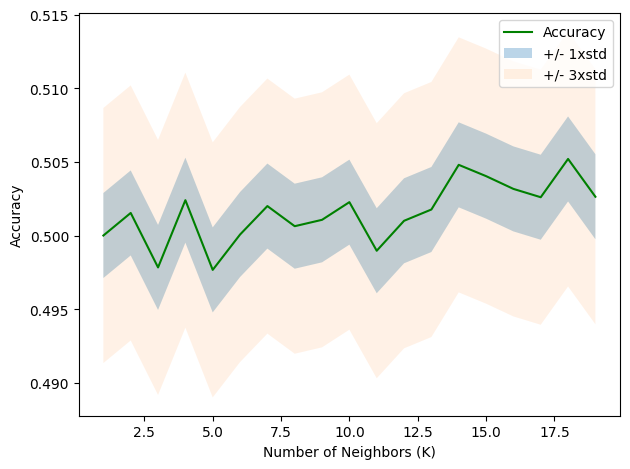

The best accuracy was with 0.5052 with k = 18


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    knn1 = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=knn1.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc,
                 mean_acc + 1 * std_acc, alpha=0.3)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc,
                 mean_acc + 3 * std_acc, alpha=0.1)
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


best_k = np.argmax(mean_acc) + 1
print("The best accuracy was with", mean_acc.max(), "with k =", best_k)

### Parameter Tunning using Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(15,20))
weight_options = ['uniform','distance']
pow = [1,2]
param_grid = dict(n_neighbors = k_range,
                  weights = weight_options,
                  p = pow)
knn_gs = KNeighborsClassifier()
grid_k = GridSearchCV(knn_gs,
                      param_grid,
                      cv=10,scoring='accuracy')
grid_k.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [15, 16, 17, 18, 19], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", grid_k.best_params_)
print("Accuracy :",grid_k.best_score_)

Tuned Hyperparameters : {'n_neighbors': 18, 'p': 2, 'weights': 'uniform'}
Accuracy : 0.4999142857142857


In [ ]:
Class_Tree = grid_k.best_estimator_
print(Class_Tree)

KNeighborsClassifier(n_neighbors=18)


In [ ]:
knn1 = KNeighborsClassifier(n_neighbors= 20, p = 1, weights='distance')
knn1.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=20, p=1, weights='distance')

In [ ]:
yhat = knn1.predict(X_test)

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

a1 = jaccard_score(Y_test, yhat, pos_label=1, average='macro')
b1 = f1_score(Y_test, yhat, average='macro')
c1 = accuracy_score(Y_test, yhat)

print('The jaccard_score of the KNN for k = ',best_k,'classifier on train data is',a1)
print('The F1-score of the KNN for k = ',best_k,' classifier on train data is',b1)
print('The Accuracy_score of the KNN for k = ',best_k,' classifier on train data is',c1)

The jaccard_score of the KNN for k =  18 classifier on train data is 0.33505032046569905
The F1-score of the KNN for k =  18  classifier on train data is 0.5018938236874573
The Accuracy_score of the KNN for k =  18  classifier on train data is 0.502


# Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion' :['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas,
                           param_grid=param_grid,
                           cv=5,
                           verbose=True)

grid_search.fit(X_train, Y_train)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
print("Tuned Hyperparameters :", grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

Tuned Hyperparameters : {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}
Accuracy : 0.5016142857142857


In [ ]:
Class_Tree = grid_search.best_estimator_
print(Class_Tree)

DecisionTreeClassifier(ccp_alpha=0.1, max_depth=5, max_features='auto',
                       random_state=1024)


In [ ]:
Class_Tree.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(ccp_alpha=0.1, max_depth=5, max_features='auto',
                       random_state=1024)

In [ ]:
predTree = Class_Tree.predict(X_test)

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

a2= jaccard_score(Y_test, predTree,pos_label=1, average='macro')
b2 = f1_score(Y_test, predTree, average='weighted')
c2= accuracy_score(Y_test, predTree)
print("The accuraccy of (Class_ tree) DecisionTrees's {:.2f} ".
format(c2))
print('The jaccard_score of the DecisionTrees classifier is {:.2f}'.
format(a2))
print('The F1-score of the DecisionTrees classifier is {:.2f}'.
format(b2))

The accuraccy of (Class_ tree) DecisionTrees's 0.50 
The jaccard_score of the DecisionTrees classifier is 0.25
The F1-score of the DecisionTrees classifier is 0.34


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters = {
    'penalty' : ['l1','l2'],
    'C' : np.logspace(-3,3,7),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression()

In [ ]:
clf = GridSearchCV(logreg,
                   param_grid = parameters,
                   scoring='accuracy',
                   cv=10)
clf.fit(X_train,Y_train)


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.5016142857142857


In [ ]:
log_reg = clf.best_estimator_
log_reg.fit(X_train,Y_train)

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [ ]:
yhat_l = log_reg.predict(X_test)

In [ ]:
yhat_2 = log_reg.predict([])

In [ ]:
a3 = jaccard_score(Y_test, yhat_l,pos_label=1, average='macro')
b3 = f1_score(Y_test, yhat_l, average='weighted')
c3 = accuracy_score(Y_test, yhat_l)
print('The jaccard_score of the LR classifier on train data is {:.2f}'.format(a3))
print('The F1-score of the LR classifier on train data is {:.2f}'.format(b3))
print('The accuracy_score of the LR classifier on train data is {:.2f}'.format(c3))

The jaccard_score of the LR classifier on train data is 0.25
The F1-score of the LR classifier on train data is 0.34
The accuracy_score of the LR classifier on train data is 0.50


## Model Evaluation

In [ ]:
result_df=pd.DataFrame({'Model':['KNN',
                                 'Decision Tree',
                                 'Logistic Regression',],
                        'Jaccard Score' : [a1,a2,a3],
                        'F1 Score' : [b1,b2,b3],
                        'Accuracy Score':[c1,c2,c3]})

In [ ]:
print(result_df)

                 Model  Jaccard Score  F1 Score  Accuracy Score
0                  KNN        0.33505  0.501894          0.5020
1        Decision Tree        0.25180  0.337341          0.5036
2  Logistic Regression        0.25180  0.337341          0.5036


## K Fold Cross Validation

KNN: 0.500357 (0.006575)
DT: 0.500357 (0.006575)
LR: 0.500357 (0.006575)


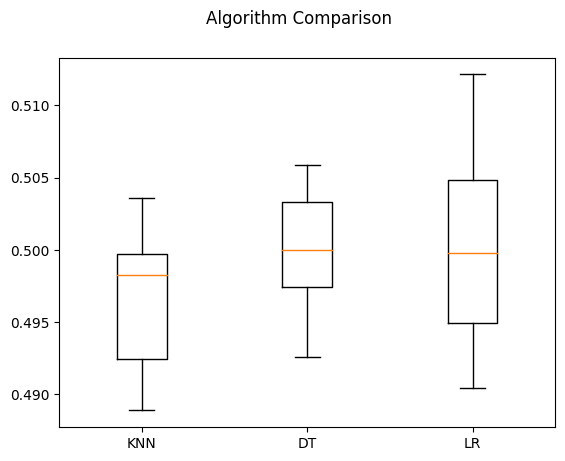

In [ ]:
from sklearn import model_selection
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', knn1))
models.append(('DT', tree_clas ))
models.append(('LR', logreg))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=10,
                                  random_state=seed,
                                  shuffle=True)
    cv_results = model_selection.cross_val_score(model,
                                                 X_train,
                                                 Y_train,
                                                 cv=kfold,
                                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
for name,model in models:
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classifiers and make a list
classifiers = [knn1,
               tree_clas,
               logreg]
model_names = ['KNN',
              'Decision Tree',
              'Logistic Regression']

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['model', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
# for cls in classifiers:
#     model = cls.fit(X_train, Y_train)
#     y_probas = model.predict_proba(X_test)[:, 1]
#     fpr, tpr, _ = roc_curve(Y_test, y_probas)
#     auc = roc_auc_score(Y_test, y_probas)

#     result_table = result_table.append({'model': model_names,
#                                         'fpr': fpr,
#                                         'tpr': tpr,
#                                         'auc': auc},
#                                        ignore_index=True)

for cls, model_name in zip(classifiers, model_names):
    model = cls.fit(X_train, Y_train)
    y_probas = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_probas)
    auc = roc_auc_score(Y_test, y_probas)

    result_table = result_table.append({'model': model_name,
                                        'fpr': fpr,
                                        'tpr': tpr,
                                        'auc': auc},
                                       ignore_index=True)

# Set the names of the classifiers as index labels
result_table.set_index('model', inplace=True)

<ipython-input-38-d0f354d7710e>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'model': model_name,
<ipython-input-38-d0f354d7710e>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'model': model_name,
<ipython-input-38-d0f354d7710e>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'model': model_name,


### Plot the Figure

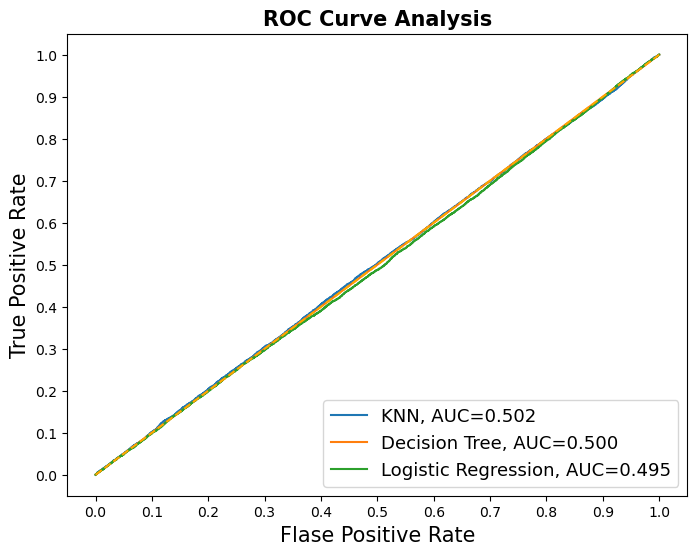

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## Saving the KNN Model as it has highest accuracy

In [ ]:
import joblib
from sklearn.neighbors import KNeighborsClassifier


best_knn_model = KNeighborsClassifier(n_neighbors=18)
best_knn_model.fit(X_train, Y_train)

# Save the KNN model to a file
model_filename = 'best_knn_model.pkl'
joblib.dump(best_knn_model, model_filename)



['best_knn_model.pkl']

### Testing the PKL file with new data

In [ ]:
loaded_knn_model = joblib.load('best_knn_model.pkl')

# Use the loaded model to make predictions on new data
new_data = [[21, 0, 5, 24, 700, 40]]
predictions = loaded_knn_model.predict(new_data)
print(predictions)

[1]


In [ ]:
loaded_knn_model = joblib.load('best_knn_model.pkl')

# Use the loaded model to make predictions on new data
new_data = [[30, 0, 8, 15, 300, 40]]
predictions = loaded_knn_model.predict(new_data)
print(predictions)

[0]


In [ ]:
from google.colab import files
files.download(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>